# Khai thác dữ liệu - Tuần 7

Họ tên : Nguyễn Tiến Phong \
MSSV : 20280071

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

## Sử dụng thư viện

In [69]:
url = "https://www.dropbox.com/s/ikgzzr30ln6akk2/data.csv?dl=1"
df = pd.read_csv(url)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [71]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = df['Age']
df['Age_Groups'] = pd.cut(x=col, bins=intervals)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Groups
0,1,Male,19,15,39,"(15, 20]"
1,2,Male,21,15,81,"(20, 30]"
2,3,Female,20,16,6,"(15, 20]"
3,4,Female,23,16,77,"(20, 30]"
4,5,Female,31,17,40,"(30, 40]"


In [72]:
df.groupby('Age_Groups')['Age_Groups'].count()

Age_Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age_Groups, dtype: int64

In [73]:
new_df = pd.get_dummies(df)
new_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age_Groups_(15, 20]","Age_Groups_(20, 30]","Age_Groups_(30, 40]","Age_Groups_(40, 50]","Age_Groups_(50, 60]","Age_Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Count'>

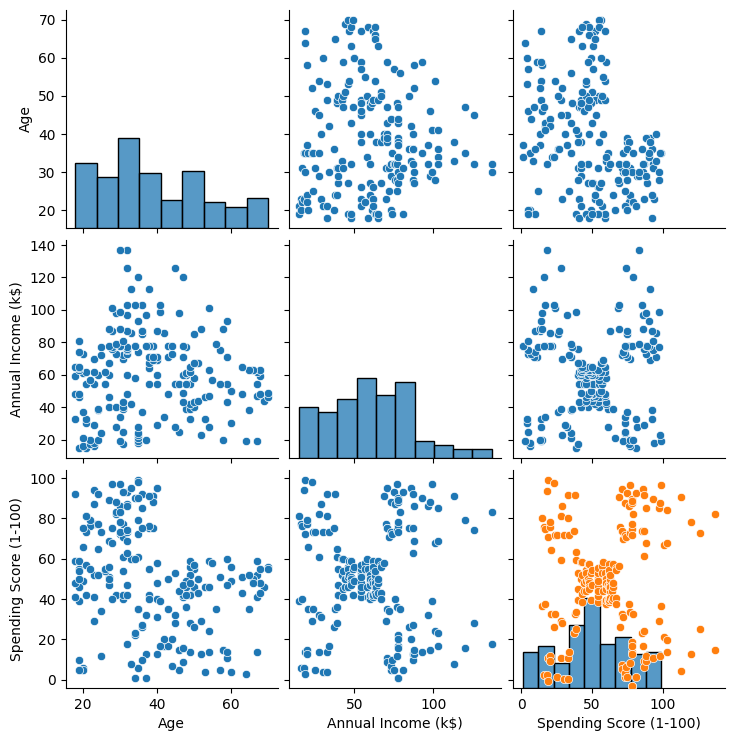

In [74]:
df.drop('CustomerID', axis=1, inplace=True)
sns.pairplot(df)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

In [75]:
new_df.drop('Age', axis=1, inplace=True)
new_df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age_Groups_(15, 20]","Age_Groups_(20, 30]","Age_Groups_(30, 40]","Age_Groups_(40, 50]","Age_Groups_(50, 60]","Age_Groups_(60, 70]"
0,1,15,39,0,1,1,0,0,0,0,0
1,2,15,81,0,1,0,1,0,0,0,0
2,3,16,6,1,0,1,0,0,0,0,0
3,4,16,77,1,0,0,1,0,0,0,0
4,5,17,40,1,0,0,0,1,0,0,0


(199, 4)


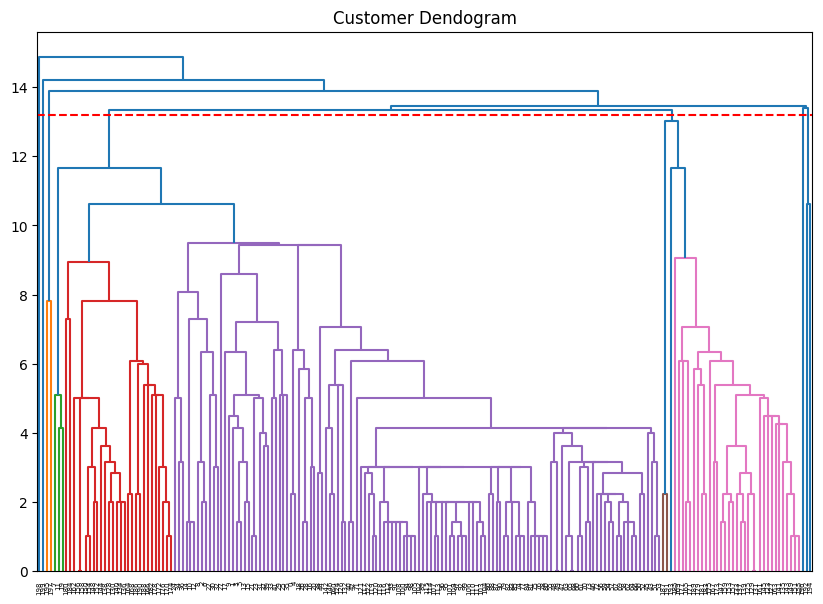

In [76]:
plt.figure(figsize=(10, 7))
plt.title('Customer Dendogram')
selected_data = new_df.iloc[:, 1:3]
clusters = shc.linkage(selected_data, method='single', metric='euclidean')
print(clusters.shape)
shc.dendrogram(Z=clusters)
plt.axhline(y=13.2, color='r', linestyle='dashed')
plt.show()

In [117]:
clustering_model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')
clustering_model.fit_predict(selected_data)
clustering_model.labels_

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 6, 1, 4, 1,
       3, 5], dtype=int64)

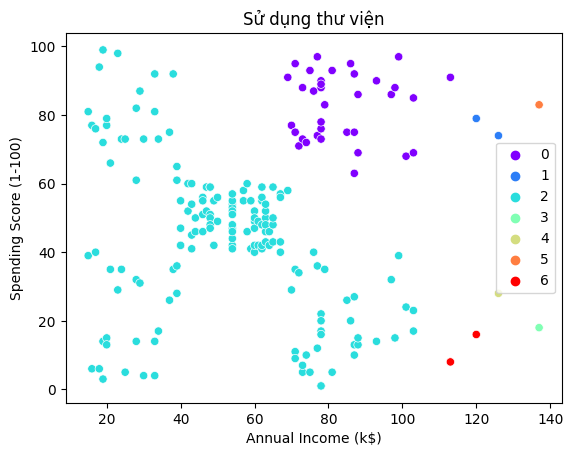

In [118]:
data_labels = clustering_model.labels_

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=selected_data, hue=data_labels, palette='rainbow').set_title('Sử dụng thư viện')
plt.show()

## Tự cài đặt Bottom-up Agglomerative

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
url = "https://www.dropbox.com/s/ikgzzr30ln6akk2/data.csv?dl=1"
df = pd.read_csv(url)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = df.iloc[:, 3:5].values

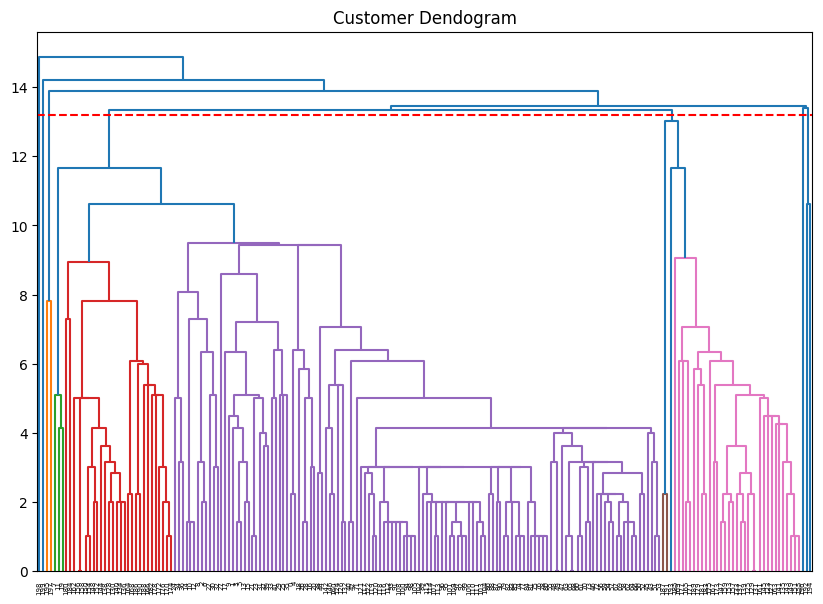

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Customer Dendogram')
clusters = shc.linkage(data, method='single', metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y=13.2, color='r', linestyle='dashed')
plt.show()

In [81]:
def calculate_distance(a, b):
    return np.linalg.norm(a - b)

In [82]:
def calculate_distance_matrix(data):
    n = len(data)
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            distances[i, j] = calculate_distance(data[i], data[j])
            distances[j, i] = distances[i, j]

    return distances

In [98]:
def bottom_up(data, k):
    
    clusters = [[i] for i in range(len(data))]
    distance_matrix = calculate_distance_matrix(data)

    while len(clusters) > k:
        min_distance = float('inf')
        merge_indices = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster_i = clusters[i]
                cluster_j = clusters[j]

                    # Tìm khoảng cách nhỏ nhất giữa các cụm
                for idx_i in cluster_i:
                    for idx_j in cluster_j:
                        distance = distance_matrix[idx_i, idx_j]
                        if distance < min_distance:
                            min_distance = distance
                            merge_indices = (i, j)

        # Gộp hai cụm có khoảng cách nhỏ nhất thành một cụm mới
        i, j = merge_indices
        clusters[i] += clusters[j]
        clusters.pop(j)

    return clusters

In [99]:
result = bottom_up(data, 7)
labels = np.zeros(len(data), dtype=int)
for i, cluster in enumerate(result):
    for j in cluster:
        labels[j] = i

In [100]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 4, 3,
       5, 6])

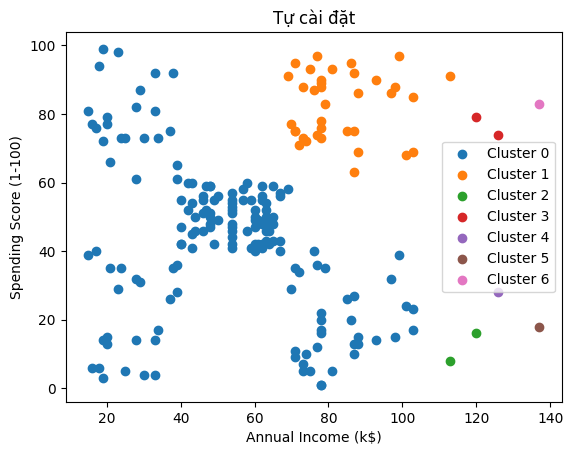

In [116]:
for label in np.unique(labels):
    cluster_points = data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Tự cài đặt')
plt.legend()
plt.show()